# Implémentation Regression linéaire multiple

In [1]:
import feather
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import category_encoders as ce
import numpy as np

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression




pd.options.display.max_columns = None
path_train = './input/train_final.feather'
path_test = './input/test_final.feather'

# Import des dataframes

In [2]:
df_train = feather.read_dataframe(path_train)
df_test = feather.read_dataframe(path_test)

# Split des dataframes

In [3]:
y_train = df_train.pop('Rating')

In [4]:
X_train = df_train

In [5]:
y_test = df_test.pop('Rating')

In [6]:
X_test = df_test

# Encoding des variables catégorielles

Nous commençons par encoder nos variables catégorielles avec un BinaryEncoder 

In [7]:
def encode_with_binary(X_train, y_train, X_test):
    cat_cols = list(X_train.select_dtypes(include=['object']).columns)
    encoder = ce.BinaryEncoder(verbose = 3, cols = cat_cols, return_df=True)
    encoder.fit(X_train, y_train)
    X_train_cat = encoder.transform(X_train)
    X_test_cat = encoder.transform(X_test)
    return X_train_cat, X_test_cat


In [8]:
X_train, X_test = encode_with_binary(X_train, y_train, X_test)

In [9]:
X_train.head(10)

,Artist,Track,User,Time,GENDER_0,GENDER_1,GENDER_2,AGE,WORKING_0,WORKING_1,WORKING_2,WORKING_3,WORKING_4,REGION_0,REGION_1,REGION_2,REGION_3,MUSIC_0,MUSIC_1,MUSIC_2,MUSIC_3,LIST_OWN,LIST_BACK,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,HEARD_OF_0,HEARD_OF_1,HEARD_OF_2,HEARD_OF_3,OWN_ARTIST_MUSIC_0,OWN_ARTIST_MUSIC_1,OWN_ARTIST_MUSIC_2,OWN_ARTIST_MUSIC_3,LIKE_ARTIST,Uninspired,Sophisticated,Aggressive,Edgy,Sociable,Laid back,Wholesome,Uplifting,Intriguing,Legendary,Free,Thoughtful,Outspoken,Serious,Good lyrics,Unattractive,Confident,Old,Youthful,Boring,Current,Colourful,Stylish,Cheap,Irrelevant,Heartfelt,Calm,Pioneer,Outgoing,Inspiring,Beautiful,Fun,Authentic,Credible,Way out,Cool,Catchy,Sensitive,Mainstream,Superficial,Annoying,Dark,Passionate,Not authentic,Good Lyrics,Background,Timeless,Depressing,Original,Talented,Worldly,Distinctive,Approachable,Genius,Trendsetter,Noisy,Upbeat,Relatable,Energetic,Exciting,Emotional,Nostalgic,None of these,Progressive,Sexy,Over,Rebellious,Fake,Cheesy,Popular,Superstar,Relaxed,Intrusive,Unoriginal,Dated,Iconic,Unapproachable,Classic,Playful,Arrogant,Warm,Soulful
0,33,85,34406,12,0,0,1,58.0,0,0,0,0,1,0,0,0,1,0,0,0,1,0.0,1.0,52.0,67.0,68.0,11.0,51.0,9.0,52.0,49.0,31.0,73.0,96.0,72.0,73.0,96.0,85.0,73.0,81.0,51.0,70.0,0,0,0,1,0,0,0,1,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,174,47314,17,0,1,0,80.0,0,0,0,1,0,0,0,1,0,0,0,1,0,1.0,2.0,53.0,28.0,25.0,48.0,69.0,50.0,33.0,34.0,35.0,58.0,34.0,35.0,48.0,49.0,8.0,28.0,29.0,50.0,32.0,0,0,1,0,0,0,0,1,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40,177,50440,17,0,1,0,18.0,0,0,0,1,1,0,0,1,0,0,0,1,1,16.0,0.0,46.0,60.0,85.0,60.0,79.0,61.0,45.0,72.0,72.0,57.0,72.0,46.0,60.0,65.0,52.0,71.0,78.0,51.0,68.0,0,0,0,1,0,0,0,1,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,33,85,25762,11,0,0,1,20.0,0,0,0,0,1,0,0,0,1,0,0,1,1,0.0,1.0,54.0,54.0,52.0,53.0,53.0,54.0,54.0,54.0,53.0,52.0,53.0,56.0,57.0,56.0,56.0,56.0,56.0,56.0,57.0,0,0,0,1,0,0,0,1,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21,48,22720,22,0,1,1,39.0,0,0,1,0,0,0,0,1,1,0,1,0,0,1.0,2.0,51.0,53.0,52.0,34.0,32.0,35.0,30.0,23.0,50.0,53.0,64.0,53.0,50.0,53.0,36.0,32.0,56.0,47.0,44.0,0,0,1,0,0,0,0,1,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,13,31,11172,19,0,0,1,20.0,0,0,1,0,1,0,0,0,1,0,0,1,1,3.0,1.0,50.0,51.0,51.0,51.0,51.0,51.0,7.0,11.0,52.0,92.0,55.0,55.0,32.0,34.0,9.0,49.0,50.0,51.0,50.0,0,0,0,1,0,0,0,1,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [10]:
X_test.head(10)

,Artist,Track,User,Time,GENDER_0,GENDER_1,GENDER_2,AGE,WORKING_0,WORKING_1,WORKING_2,WORKING_3,WORKING_4,REGION_0,REGION_1,REGION_2,REGION_3,MUSIC_0,MUSIC_1,MUSIC_2,MUSIC_3,LIST_OWN,LIST_BACK,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,HEARD_OF_0,HEARD_OF_1,HEARD_OF_2,HEARD_OF_3,OWN_ARTIST_MUSIC_0,OWN_ARTIST_MUSIC_1,OWN_ARTIST_MUSIC_2,OWN_ARTIST_MUSIC_3,LIKE_ARTIST,Uninspired,Sophisticated,Aggressive,Edgy,Sociable,Laid back,Wholesome,Uplifting,Intriguing,Legendary,Free,Thoughtful,Outspoken,Serious,Good lyrics,Unattractive,Confident,Old,Youthful,Boring,Current,Colourful,Stylish,Cheap,Irrelevant,Heartfelt,Calm,Pioneer,Outgoing,Inspiring,Beautiful,Fun,Authentic,Credible,Way out,Cool,Catchy,Sensitive,Mainstream,Superficial,Annoying,Dark,Passionate,Not authentic,Good Lyrics,Background,Timeless,Depressing,Original,Talented,Worldly,Distinctive,Approachable,Genius,Trendsetter,Noisy,Upbeat,Relatable,Energetic,Exciting,Emotional,Nostalgic,None of these,Progressive,Sexy,Over,Rebellious,Fake,Cheesy,Popular,Superstar,Relaxed,Intrusive,Unoriginal,Dated,Iconic,Unapproachable,Classic,Playful,Arrogant,Warm,Soulful
0,25,59,18161,21,0,1,0,44.0,0,0,0,1,1,0,0,0,1,0,0,1,0,0.0,0.0,52.0,53.0,48.0,6.0,7.0,48.0,47.0,47.0,49.0,49.0,50.0,69.0,49.0,49.0,9.0,10.0,71.0,52.0,52.0,0,0,1,0,0,0,0,1,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,35,88,28759,23,0,1,0,36.0,0,0,0,0,1,0,0,1,0,0,1,0,1,2.0,0.0,52.0,51.0,67.0,52.0,34.0,53.0,32.0,32.0,53.0,72.0,68.0,68.0,69.0,70.0,70.0,32.0,71.0,52.0,47.0,0,0,1,0,0,0,0,1,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21,48,20142,21,0,0,1,61.0,0,0,0,1,0,0,0,0,1,0,0,1,0,0.0,1.0,5.0,53.0,24.0,9.0,5.0,85.0,3.0,4.0,69.0,56.0,79.0,51.0,4.0,4.0,4.0,6.0,7.0,3.0,6.0,0,0,1,0,0,0,0,1,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,41,155,41201,16,0,0,1,14.0,0,0,1,0,1,0,0,1,0,0,0,0,1,1.0,2.0,54.0,55.0,52.0,57.0,57.0,53.0,55.0,50.0,53.0,51.0,63.0,65.0,52.0,57.0,57.0,58.0,60.0,54.0,54.0,0,0,0,1,0,0,0,1,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10,141,34253,12,0,0,1,63.0,0,0,0,1,0,0,0,0,1,0,0,1,0,0.0,2.0,35.0,35.0,51.0,77.0,73.0,31.0,32.0,33.0,98.0,49.0,75.0,75.0,23.0,31.0,12.0,33.0,75.0,34.0,34.0,0,0,1,0,0,0,0,1,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,43,159,42337,16,0,0,1,50.0,0,1,0,0,1,0,0,0,1,0,0,1,0,0.0,0.0,12.0,30.0,16.0,33.0,32.0,52.0,10.0,8.0,88.0,29.0,33.0,29.0,12.0,14.0,14.0,13.0,73.0,10.0,11.0,0,0,1,0,0,0,0,1,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

# Root Mean Squared Error

In [11]:
def compute_RMSE(y_true, y_pred):
    #la prédiction doit avoir un format entier
    tmp = []
    for el in y_pred:
        tmp.append(round(el))
    RMSE = np.sqrt(np.mean((y_true-tmp)**2))
    print("Root mean squared error: {}".format(RMSE))


# Régression multiple

In [22]:
#Instanciation
lin_reg = LinearRegression()

In [23]:
#Fit sur l'entraînement
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
# Prediction sur le jeu de test
y_pred = lin_reg.predict(X_test)
#df_y_pred = pd.DataFrame(y_pred)
#print(df_y_pred)
#print (y_test)

Root mean squared error: 16.181474225602486


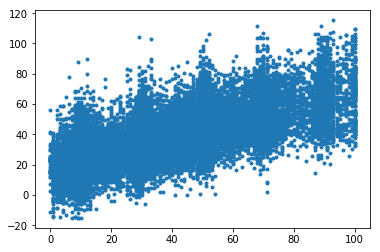

In [25]:
compute_RMSE(y_test, y_pred)

plt.plot(y_test, y_pred,'.')
plt.show()

En utilisant un modèle de régression linéaire multiple, nous obtenons une RMSE de 16,18. Ce n'est pas le meilleur résultat mais un résultat satisfaisant pour un modèle aussi simple.

In [26]:
#Export du model et chargement
import pickle
pickle.dump(lin_reg, open("./output/multi_lin_reg.dat", "wb"))
#loaded_model = pickle.load(open("./output/xgboost.dat", "rb"))

# Export du dataframe sous le bon format

In [27]:
test = pd.read_csv('./input/test.csv')


In [28]:
ratings = pd.DataFrame(y_pred, columns=['Rating']) 

In [29]:
export_df = pd.concat([test[['Artist', 'Track', 'User']].reset_index(drop=True), ratings.reset_index(drop=True), test[['Time']].reset_index(drop=True)], axis=1)

In [30]:
export_df.to_csv('./output/submit_lin_reg.csv')